In [33]:
import math
import numpy as np
natom = 6300
L = 39.5

In [45]:
f = open('y1_y2-190-1avg.dat' , 'r')
latent_vector = np.zeros((4623,2))
y1 = []
y2 = []
x = []
i = 0
while True:
    s = f.readline().split()
    if not s :break
    xpos = float(s[1])
    if abs(xpos) > L/4. :
        x.append(float(s[1]))
        latent_vector[i,0] = float(s[2])
        latent_vector[i,1] = float(s[3])
        y1.append(float(s[2]))
        y2.append(float(s[3]))
        i+=1
    

In [46]:
natom = i
i

4623

In [47]:
from sklearn import mixture
import matplotlib.pyplot as plt
lowest_bic = np.infty
bic = []
n_components_range = range(1, 8)
for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components)
        gmm.fit(latent_vector)
        bic.append(gmm.bic(latent_vector))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
bic = np.array(bic)
bic

array([-47396.67945816, -55342.81030933, -55705.60178063, -55713.08560002,
       -55676.66181888, -55631.47022281, -55611.85812514])

Text(0, 0.5, 'BIC')

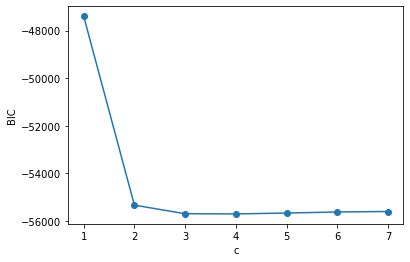

In [48]:
component = [1,2,3,4,5,6,7]
plt.plot(component,bic)
plt.scatter(component,bic)
plt.xlabel('c')
plt.ylabel('BIC')
#plt.savefig('BIC_neq-hot-190.png' ,dpi = 100)

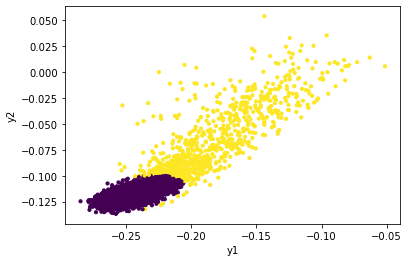

In [49]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
gausno = 2
gmm = GaussianMixture(n_components=gausno).fit(latent_vector)
labels = gmm.predict(latent_vector)
plt.xlabel('y1')
plt.ylabel('y2')
plt.scatter(y1, y2, c=labels, s=10, cmap='viridis')
prediction_gmm = gmm.predict(latent_vector)
probs = gmm.predict_proba(latent_vector)
#plt.savefig('gmm-190-cold.png' ,dpi = 500)

In [51]:
group1 = []
group2 = []
for i in range(natom):
    #print(probs[i,])
    if probs[i,0] > probs[i,1] :
        group1.append(i)
    else:
        group2.append(i)
        
probs[1]

array([0.99183147, 0.00816853])

In [53]:
scatter1y1=[]
scatter1y2=[]
fsave = open('cluster1-190.dat','w')
for i in range(len(group1)):
    scatter1y1.append(y1[group1[i]])
    scatter1y2.append(y2[group1[i]])
    fsave.write("%f \t %f" % (y1[group1[i]],y2[group1[i]]))
    fsave.write('\n')

fsave.close()    
fsave = open('cluster2-190.dat','w')
for i in range(len(group2)):
    scatter1y1.append(y1[group2[i]])
    scatter1y2.append(y2[group2[i]])
    fsave.write("%f \t %f" % (y1[group2[i]],y2[group2[i]]))
    fsave.write('\n')    

In [84]:
f2 = open('qs_19000001avg.dat' , 'r')
total = 6400
natom = 6300
test = total-natom
x_botrain = np.zeros((natom,8))
x_pos = np.zeros(natom)
atom = 0
j = 0
while True:
    s = f2.readline().split()
    if not s: break
    if atom < natom:   
        xpos = float(s[1])
        #print(xpos)
        if abs(xpos) > L/4. :
            for i in range(8):
                x_botrain[j,i] = float(s[i+2])
            j = j +1 
            #print(j)
    atom = atom + 1
x_botrain[0],x_botrain.shape
x_botrain = x_botrain.astype('float32')
j

4623

In [86]:
Qy1=[]
Qy2=[]
fsave = open('QC-190.dat','w')
for i in range(len(group1)):
    #Qy1.append(y1[group1[i]])
    #Qy2.append(y2[group1[i]])
    #fsave.write("%f \t %f" % (y1[group1[i]],y2[group1[i]]))
    fsave.write("%f \t %f" % (x_botrain[group1[i],3],x_botrain[group1[i],5]))
    fsave.write('\n')

fsave.close()    
fsave = open('QL-190.dat','w')
for i in range(len(group2)):
    #scatter1y1.append(y1[group2[i]])
    #scatter1y2.append(y2[group2[i]])
    fsave.write("%f \t %f" % (x_botrain[group2[i],3],x_botrain[group2[i],5]))
    fsave.write('\n')    

In [117]:
probK1 = probs

import math
SK1 = 0.
for i in range(natom):
    for j in range(gausno):
        if probs[i,j]!=0.:
            SK1 += probs[i,j]*math.log(probs[i,j])  
SK1 = -SK1
SK1  

1936.9952872962538

In [118]:
y1[group1[i]]

IndexError: list index out of range

In [119]:
import math
a = math.comb(gausno,2)
sum = np.zeros(a)
IDJ = []
IDK = []
probK1
for i in range(natom):
    totprob = 0.
    for j in range(gausno):
        totprob = totprob + probK1[i,j]
    print(i,totprob)

0 0.9999999999999998
1 0.9999999999999998
2 0.9999999999999998
3 0.9999999999999997
4 1.0
5 1.0
6 1.0000000000000002
7 1.0
8 1.0000000000000002
9 0.9999999999999998
10 1.0
11 0.9999999999999998
12 1.0000000000000007
13 1.0000000000000002
14 1.0000000000000004
15 1.0
16 0.9999999999999999
17 0.9999999999999998
18 0.9999999999999999
19 1.0000000000000002
20 0.9999999999999998
21 0.9999999999999999
22 0.9999999999999998
23 1.0
24 0.9999999999999998
25 0.9999999999999997
26 1.0
27 1.0
28 1.0000000000000004
29 1.0
30 0.9999999999999996
31 0.9999999999999997
32 1.0000000000000002
33 1.0
34 1.0000000000000002
35 1.0000000000000002
36 1.0
37 1.0
38 1.0
39 1.0000000000000004
40 1.0000000000000002
41 0.9999999999999999
42 0.9999999999999999
43 1.0000000000000002
44 1.0000000000000002
45 1.0000000000000004
46 1.0
47 0.9999999999999997
48 1.0
49 1.0000000000000002
50 1.0
51 0.9999999999999996
52 1.0000000000000004
53 1.0
54 1.0
55 1.0000000000000004
56 1.0
57 1.0000000000000002
58 0.99999999999999

895 0.9999999999999997
896 0.9999999999999998
897 1.0
898 0.9999999999999996
899 1.0
900 1.0
901 0.9999999999999997
902 1.0
903 1.0
904 0.9999999999999998
905 0.9999999999999998
906 1.0
907 0.9999999999999998
908 1.0000000000000002
909 1.0
910 1.0
911 0.9999999999999996
912 1.0000000000000004
913 1.0
914 0.9999999999999996
915 0.9999999999999998
916 1.0000000000000002
917 1.0000000000000004
918 0.9999999999999996
919 0.9999999999999998
920 1.0000000000000002
921 0.9999999999999997
922 0.9999999999999998
923 1.0000000000000002
924 1.0
925 0.9999999999999999
926 1.0000000000000002
927 1.0
928 0.9999999999999997
929 1.0000000000000004
930 1.0000000000000002
931 1.0000000000000002
932 0.9999999999999999
933 1.0000000000000004
934 0.9999999999999996
935 1.0
936 1.0
937 1.0
938 1.0000000000000002
939 0.9999999999999998
940 0.9999999999999998
941 0.9999999999999996
942 0.9999999999999997
943 1.0
944 1.0000000000000002
945 0.9999999999999998
946 1.0000000000000002
947 1.0
948 0.999999999999999

1872 0.9999999999999998
1873 0.9999999999999998
1874 1.0000000000000002
1875 1.0
1876 1.0000000000000004
1877 1.0000000000000002
1878 1.0
1879 1.0
1880 1.0000000000000002
1881 1.0
1882 1.0000000000000004
1883 1.0000000000000002
1884 1.0000000000000002
1885 0.9999999999999998
1886 0.9999999999999998
1887 0.9999999999999997
1888 1.0
1889 0.9999999999999997
1890 1.0000000000000002
1891 1.0000000000000002
1892 1.0
1893 1.0
1894 0.9999999999999999
1895 1.0
1896 1.0
1897 1.0000000000000002
1898 0.9999999999999999
1899 0.9999999999999998
1900 1.0000000000000007
1901 1.0000000000000004
1902 0.9999999999999997
1903 0.9999999999999997
1904 1.0
1905 0.9999999999999999
1906 0.9999999999999998
1907 1.0000000000000002
1908 1.0000000000000002
1909 1.0000000000000002
1910 1.0000000000000002
1911 1.0
1912 1.0000000000000002
1913 0.9999999999999999
1914 0.9999999999999997
1915 0.9999999999999999
1916 0.9999999999999999
1917 1.0000000000000002
1918 0.9999999999999997
1919 1.0
1920 0.9999999999999997
1921

2494 0.9999999999999998
2495 0.9999999999999997
2496 1.0
2497 1.0000000000000004
2498 0.9999999999999996
2499 1.0
2500 1.0
2501 1.0
2502 1.0000000000000002
2503 1.0
2504 1.0
2505 1.0
2506 1.0
2507 0.9999999999999999
2508 1.0
2509 1.0
2510 1.0000000000000002
2511 0.9999999999999998
2512 1.0
2513 0.9999999999999999
2514 1.0000000000000002
2515 1.0000000000000002
2516 1.0
2517 0.9999999999999997
2518 1.0
2519 0.9999999999999999
2520 1.0
2521 1.0000000000000002
2522 0.9999999999999998
2523 1.0000000000000002
2524 1.0
2525 1.0
2526 0.9999999999999998
2527 0.9999999999999999
2528 0.9999999999999999
2529 1.0000000000000002
2530 0.9999999999999999
2531 1.0
2532 0.9999999999999998
2533 1.0
2534 1.0
2535 1.0000000000000002
2536 1.0000000000000004
2537 1.0
2538 1.0
2539 0.9999999999999998
2540 1.0000000000000002
2541 0.9999999999999999
2542 1.0000000000000004
2543 1.0000000000000002
2544 1.0
2545 1.0
2546 1.0
2547 1.0
2548 1.0
2549 0.9999999999999999
2550 1.0000000000000004
2551 0.999999999999999

3630 0.9999999999999999
3631 0.9999999999999999
3632 1.0
3633 1.0
3634 0.9999999999999999
3635 1.0
3636 1.0000000000000002
3637 1.0000000000000002
3638 1.0000000000000002
3639 0.9999999999999999
3640 1.0
3641 1.0000000000000002
3642 0.9999999999999999
3643 1.0
3644 0.9999999999999999
3645 1.0000000000000004
3646 1.0000000000000002
3647 1.0000000000000002
3648 0.9999999999999998
3649 0.9999999999999996
3650 1.0
3651 1.0000000000000002
3652 0.9999999999999996
3653 1.0000000000000004
3654 1.0000000000000004
3655 0.9999999999999996
3656 0.9999999999999999
3657 1.0
3658 1.0
3659 1.0000000000000002
3660 1.0
3661 1.0
3662 0.9999999999999998
3663 1.0000000000000004
3664 1.0
3665 1.0000000000000004
3666 1.0
3667 1.0000000000000004
3668 1.0
3669 1.0000000000000004
3670 0.9999999999999998
3671 1.0000000000000004
3672 1.0
3673 1.0000000000000002
3674 0.9999999999999998
3675 1.0000000000000002
3676 1.0000000000000002
3677 0.9999999999999998
3678 1.0
3679 1.0
3680 0.9999999999999994
3681 0.999999999

4243 1.0000000000000002
4244 0.9999999999999998
4245 1.0000000000000002
4246 1.0
4247 1.0000000000000004
4248 0.9999999999999999
4249 0.9999999999999999
4250 0.9999999999999996
4251 1.0
4252 1.0000000000000004
4253 1.0000000000000002
4254 1.0
4255 0.9999999999999998
4256 1.0000000000000002
4257 1.0000000000000002
4258 1.0000000000000004
4259 1.0000000000000002
4260 1.0000000000000002
4261 1.0000000000000002
4262 1.0
4263 0.9999999999999997
4264 1.0000000000000004
4265 1.0
4266 1.0000000000000002
4267 0.9999999999999999
4268 1.0000000000000004
4269 0.9999999999999999
4270 0.9999999999999997
4271 1.0000000000000002
4272 0.9999999999999996
4273 1.0000000000000002
4274 0.9999999999999997
4275 1.0
4276 0.9999999999999997
4277 1.0000000000000004
4278 1.0
4279 1.0
4280 0.9999999999999997
4281 0.9999999999999996
4282 1.0000000000000004
4283 0.9999999999999996
4284 1.0
4285 0.9999999999999996
4286 0.9999999999999998
4287 0.9999999999999997
4288 0.9999999999999997
4289 1.0000000000000002
4290 1.

In [120]:
for i in range(natom):
    p = 0
    for j in range(gausno-1):
        for k in range(j+1,gausno):
            #if probK4[i,j]!=0. and probK4[i,j]!=0.:
            sum[p] += (probK1[i,j]+probK1[i,k])*math.log((probK1[i,j]+probK1[i,k]))
            if probK1[i,j]!=0. :    
                sum[p] += probK1[i,j]*math.log(probK1[i,j])
            if probK1[i,k]!=0. :   
                sum[p] += probK1[i,k]*math.log(probK1[i,k])
            if i==0 :
                IDJ.append(j)
                IDK.append(k)
                print(j,k)
            p = p+ 1 
sum = - sum  
sum

0 1
0 2
0 3
1 2
1 3
2 3


array([1797.55104453, 1511.89656865, 2150.44392998, 1323.13309407,
        987.90044858, 1708.82809811])

In [121]:
a = max(sum)
sum1list = sum.tolist()
b = IDJ[sum1list.index(a)]
c = IDK[sum1list.index(a)]
min(b,c)

0

In [122]:
probK2 = np.zeros((natom,gausno-1))
for i in range(natom):
    k = 0
    for j in range(gausno):
        if j == min(b,c):
            test = max(b,c)
            probK2[i,k] = probK1[i,j] + probK1[i,test]
            k += 1
        if j != max(b,c) and j!= min(b,c):
            probK2[i,k] = probK1[i,j]
            k += 1    
probK2

for i in range(natom):
    totprob = 0.
    for j in range(gausno-1):
        totprob = totprob + probK2[i,j]
    print(totprob)

0.9999999999999998
0.9999999999999998
0.9999999999999998
0.9999999999999996
1.0
1.0
1.0000000000000002
1.0
1.0000000000000002
0.9999999999999998
0.9999999999999999
0.9999999999999998
1.0000000000000004
1.0000000000000002
1.0000000000000004
1.0
0.9999999999999999
0.9999999999999998
0.9999999999999999
1.0000000000000002
0.9999999999999998
0.9999999999999999
0.9999999999999998
1.0
0.9999999999999998
0.9999999999999997
1.0
1.0
1.0000000000000004
1.0
0.9999999999999997
0.9999999999999998
1.0000000000000004
1.0000000000000002
1.0000000000000002
1.0000000000000002
1.0
1.0
1.0
1.0000000000000004
1.0000000000000002
0.9999999999999998
1.0
1.0000000000000002
1.0
1.0000000000000002
1.0
0.9999999999999996
1.0
1.0000000000000002
1.0
0.9999999999999994
1.0000000000000007
1.0
1.0
1.0000000000000004
1.0
1.0000000000000002
0.9999999999999997
1.0
1.0
0.9999999999999994
1.0000000000000004
1.0000000000000002
0.9999999999999997
0.9999999999999998
1.0
1.0000000000000004
1.0
0.9999999999999999
0.9999999999999

1.0000000000000002
0.9999999999999997
0.9999999999999996
1.0000000000000002
0.9999999999999999
1.0
1.0
1.0000000000000004
1.0000000000000002
1.0
0.9999999999999996
1.0
1.0
1.0000000000000002
1.0
1.0000000000000004
1.0000000000000004
0.9999999999999999
1.0
0.9999999999999998
1.0000000000000002
1.0000000000000002
1.0000000000000002
1.0
0.9999999999999996
0.9999999999999999
0.9999999999999998
1.0
0.9999999999999997
0.9999999999999999
1.0000000000000002
1.0
1.0000000000000004
1.0000000000000002
1.0000000000000002
1.0000000000000004
0.9999999999999999
0.9999999999999996
0.9999999999999999
0.9999999999999999
0.9999999999999998
0.9999999999999997
1.0
0.9999999999999998
1.0
1.0
0.9999999999999996
1.0000000000000004
0.9999999999999998
1.0
1.0
0.9999999999999996
0.9999999999999996
0.9999999999999999
1.0000000000000002
0.9999999999999999
1.0
1.0
0.9999999999999998
1.0
0.9999999999999996
1.0
1.0000000000000004
0.9999999999999998
0.9999999999999999
1.0
0.9999999999999996
1.0000000000000002
1.000000

1.0
1.0
1.0
1.0
0.9999999999999997
0.9999999999999998
1.0000000000000002
1.0
0.9999999999999998
1.0
1.0
1.0
1.0
1.0
1.0000000000000004
1.0000000000000002
0.9999999999999994
0.9999999999999996
1.0000000000000002
1.0000000000000002
1.0000000000000002
0.9999999999999998
0.9999999999999999
1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0000000000000004
0.9999999999999999
1.0000000000000004
0.9999999999999999
0.9999999999999998
1.0000000000000002
1.0
0.9999999999999998
1.0
1.0
0.9999999999999999
0.9999999999999998
0.9999999999999998
1.0000000000000002
1.0000000000000002
1.0000000000000002
1.0000000000000002
0.9999999999999999
1.0000000000000004
1.0000000000000002
0.9999999999999999
1.0
1.0000000000000002
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999997
0.9999999999999998
0.9999999999999996
1.0000000000000002
1.0000000000000002
1.0
1.0000000000000002
0.9999999999999998
1.0
1.0000000000000004
1.0000000000000004
0.99

1.0
1.0
0.9999999999999998
1.0000000000000002
1.0
0.9999999999999998
0.9999999999999998
0.9999999999999998
1.0
1.0000000000000002
0.9999999999999997
0.9999999999999997
1.0000000000000004
1.0000000000000002
1.0000000000000002
1.0000000000000002
1.0000000000000002
1.0
1.0
0.9999999999999999
0.9999999999999997
1.0000000000000002
1.0000000000000002
1.0000000000000002
0.9999999999999997
0.9999999999999997
1.0000000000000002
0.9999999999999999
0.9999999999999997
0.9999999999999998
0.9999999999999997
1.0000000000000004
1.0
1.0000000000000002
1.0000000000000002
0.9999999999999998
0.9999999999999994
0.9999999999999997
1.0
1.0000000000000004
1.0000000000000004
0.9999999999999997
0.9999999999999999
1.0000000000000002
1.0000000000000004
0.9999999999999999
1.0
0.9999999999999999
0.9999999999999996
1.0000000000000004
1.0
0.9999999999999996
1.0000000000000002
0.9999999999999998
0.9999999999999996
0.9999999999999996
1.0000000000000002
0.9999999999999999
0.9999999999999998
1.0
0.9999999999999999
1.0000

In [123]:
SK2 = 0.
for i in range(natom):
    for j in range(gausno-1):
        if probK2[i,j]!=0.:
            SK2+= probK2[i,j]*math.log(probK2[i,j])  
SK2 = -SK2
SK2

1536.6602427926862

In [124]:
a = math.comb(gausno-1,2)
sum = np.zeros(a)
IDJ = []
IDK = []
for i in range(natom):
    p = 0
    for j in range(gausno-2):
        for k in range(j+1,gausno-1):
            #if probK4[i,j]!=0. and probK4[i,j]!=0.:
            sum[p] += (probK2[i,j]+probK2[i,k])*math.log((probK2[i,j]+probK2[i,k]))
            if probK2[i,j]!=0. :    
                sum[p] += probK2[i,j]*math.log(probK2[i,j])
            if probK2[i,k]!=0. :   
                sum[p] += probK2[i,k]*math.log(probK2[i,k])
            if i==0 :
                IDJ.append(j)
                IDK.append(k)
                print(j,k)
            p = p+ 1 
sum = - sum 
sum
a = max(sum)
sumlist = sum.tolist()
b = IDJ[sumlist.index(a)]
c = IDK[sumlist.index(a)]
min(b,c)

probK3 = np.zeros((natom,gausno-2))
for i in range(natom):
    k = 0
    for j in range(gausno-1):
        if j == min(b,c):
            test = max(b,c)
            probK3[i,k] = probK2[i,j] + probK2[i,test]
            k += 1
        if j != max(b,c) and j!= min(b,c):
            probK3[i,k] = probK2[i,j]
            k += 1    
probK3

0 1
0 2
1 2


array([[2.46075242e-01, 7.53924758e-01],
       [1.29566518e-01, 8.70433482e-01],
       [9.97354773e-01, 2.64522716e-03],
       ...,
       [1.00000000e+00, 4.18208943e-13],
       [1.00000000e+00, 8.21429365e-11],
       [1.90449456e-01, 8.09550544e-01]])

In [125]:
SK3 = 0.
for i in range(natom):
    for j in range(gausno-2):
        if probK3[i,j]!=0.:
            SK3+= probK3[i,j]*math.log(probK3[i,j])  
SK3 = -SK3
SK3

1178.1036244373847

In [126]:
a = math.comb(gausno-2,2)
sum = np.zeros(a)
IDJ = []
IDK = []
for i in range(natom):
    p = 0
    for j in range(gausno-3):
        for k in range(j+1,gausno-2):
            #if probK4[i,j]!=0. and probK4[i,j]!=0.:
            sum[p] += (probK3[i,j]+probK3[i,k])*math.log((probK3[i,j]+probK3[i,k]))
            if probK3[i,j]!=0. :    
                sum[p] += probK3[i,j]*math.log(probK3[i,j])
            if probK3[i,k]!=0. :   
                sum[p] += probK3[i,k]*math.log(probK3[i,k])
            if i==0 :
                IDJ.append(j)
                IDK.append(k)
                print(j,k)
            p = p+ 1 
sum = - sum
sum
a = max(sum)
sumlist = sum.tolist()
b = IDJ[sumlist.index(a)]
c = IDK[sumlist.index(a)]
min(b,c)

probK4 = np.zeros((natom,gausno-3))
for i in range(natom):
    k = 0
    for j in range(gausno-2):
        if j == min(b,c):
            test = max(b,c)
            probK4[i,k] = probK3[i,j] + probK3[i,test]
            k += 1
        if j != max(b,c) and j!= min(b,c):
            probK4[i,k] = probK3[i,j]
            k += 1    
probK4

0 1


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [127]:
SK4 = 0.
for i in range(natom):
    for j in range(gausno-3):
        if probK4[i,j]!=0.:
            SK4+= probK4[i,j]*math.log(probK4[i,j])  
SK4 = -SK4
SK4

2.06501482580279e-14

In [28]:
a = math.comb(gausno-3,2)
sum = np.zeros(a)
IDJ = []
IDK = []
for i in range(natom):
    p = 0
    for j in range(gausno-4):
        for k in range(j+1,gausno-3):
            #if probK4[i,j]!=0. and probK4[i,j]!=0.:
            sum[p] += (probK4[i,j]+probK4[i,k])*math.log((probK4[i,j]+probK4[i,k]))
            if probK4[i,j]!=0. :    
                sum[p] += probK4[i,j]*math.log(probK4[i,j])
            if probK4[i,k]!=0. :   
                sum[p] += probK4[i,k]*math.log(probK4[i,k])
            if i==0 :
                IDJ.append(j)
                IDK.append(k)
                print(j,k)
            p = p+ 1 
sum = - sum
sum
a = max(sum)
sumlist = sum.tolist()
b = IDJ[sumlist.index(a)]
c = IDK[sumlist.index(a)]
min(b,c)

probK5= np.zeros((natom,gausno-4))
for i in range(natom):
    k = 0
    for j in range(gausno-3):
        if j == min(b,c):
            test = max(b,c)
            probK5[i,k] = probK4[i,j] + probK4[i,test]
            k += 1
        if j != max(b,c) and j!= min(b,c):
            probK5[i,k] = probK4[i,j]
            k += 1    
probK5

0 1
0 2
1 2


array([[0.30197715, 0.69802285],
       [0.96816072, 0.03183928],
       [0.75234582, 0.24765418],
       ...,
       [0.96963108, 0.03036892],
       [0.73685513, 0.26314487],
       [0.95342572, 0.04657428]])

In [29]:
9.84165952e-19+ 9.99994455e-01

0.999994455

In [30]:
SK5 = 0.
for i in range(natom):
    for j in range(gausno-4):
        if probK5[i,j]!=0.:
            SK5+= probK5[i,j]*math.log(probK5[i,j])  
SK5 = -SK5
SK5

1733.4662840688654

In [31]:
a = math.comb(gausno-4,2)
sum = np.zeros(a)
IDJ = []
IDK = []
for i in range(natom):
    p = 0
    for j in range(gausno-5):
        for k in range(j+1,gausno-4):
            #if probK4[i,j]!=0. and probK4[i,j]!=0.:
            sum[p] += (probK5[i,j]+probK5[i,k])*math.log((probK5[i,j]+probK5[i,k]))
            if probK5[i,j]!=0. :    
                sum[p] += probK5[i,j]*math.log(probK5[i,j])
            if probK5[i,k]!=0. :   
                sum[p] += probK5[i,k]*math.log(probK5[i,k])
            if i==0 :
                IDJ.append(j)
                IDK.append(k)
                print(j,k)
            p = p+ 1 
sum = - sum
sum
a = max(sum)
sumlist = sum.tolist()
b = IDJ[sumlist.index(a)]
c = IDK[sumlist.index(a)]
min(b,c)

probK6= np.zeros((natom,gausno-5))
for i in range(natom):
    k = 0
    for j in range(gausno-4):
        if j == min(b,c):
            test = max(b,c)
            probK6[i,k] = probK5[i,j] + probK5[i,test]
            k += 1
        if j != max(b,c) and j!= min(b,c):
            probK6[i,k] = probK5[i,j]
            k += 1    
probK6

0 1


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [32]:
SK6 = 0.
for i in range(natom):
    for j in range(gausno-5):
        if probK6[i,j]!=0.:
            SK6+= probK6[i,j]*math.log(probK6[i,j])  
SK6 = -SK6
SK6

2.3314683517128284e-14

In [129]:
entropy=[SK4,SK3,SK2,SK1]
cluster = [1,2,3,4]

Text(0, 0.5, 'Entropy')

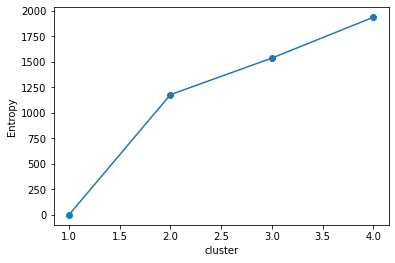

In [130]:
plt.plot(cluster,entropy)
plt.scatter(cluster,entropy)
plt.xlabel('cluster')
plt.ylabel('Entropy')
#plt.savefig('entropy-vs-c-cold_190.png' ,dpi = 100)

In [196]:
y1intrfc=[]
y2intrfc=[]
L = 39.5
for i in range(natom):
    if abs(x[i]) > L/4. and abs(x[i]) < 12.7 :
        y1intrfc.append(y1[i])
        y2intrfc.append(y2[i])
        

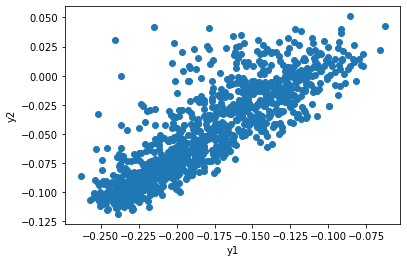

In [218]:
plt.xlabel('y1')
plt.ylabel('y2')
plt.scatter(y1intrfc, y2intrfc)

In [219]:
y1bulk=[]
y2bulk=[]
y1hot = []
y2hot = []
L = 20.0
for i in range(natom):
    if abs(x[i]) > 12.7 :
        y1bulk.append(y1[i])
        y2bulk.append(y2[i])
    if abs(x[i]) < L/4.:
        y1hot.append(y1[i])
        y2hot.append(y2[i])

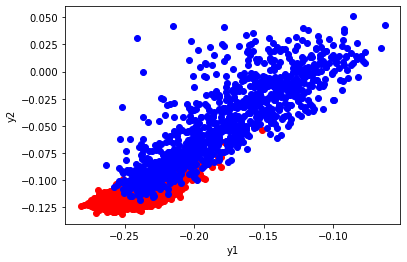

In [220]:
plt.xlabel('y1')
plt.ylabel('y2')
plt.scatter(y1bulk, y2bulk,c='r')
plt.scatter(y1intrfc, y2intrfc,c='b')

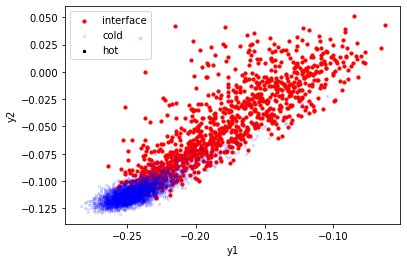

In [200]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(y1intrfc, y2intrfc, s=10, c='r', marker="o", alpha =1.0,label='interface')
ax1.scatter(y1bulk, y2bulk,s=5, c='b', marker="s", alpha =0.1, label='cold')
ax1.scatter(y1hot, y2hot,s=5, c='black', marker="s", label='hot')
plt.legend(loc='upper left');
plt.xlabel('y1')
plt.ylabel('y2')
#plt.savefig('cold-interface-hot-10-2.png' ,dpi = 500)
plt.show()

In [201]:
probs[1,0]

0.9136752147120744

In [202]:
2.56749222e-001+ 4.17919430e-178+ 7.43250778e-001

1.0

In [52]:
bulk = 0.
interface = 0.
hot = 0.
for i in range(natom):
    if abs(x[i]) > 12.7:# and abs(x[i]) > L/4.:
        print(np.where(probs[i] == max(probs[i])) , i)

(array([1]),) 0
(array([1]),) 1
(array([0]),) 2
(array([1]),) 3
(array([1]),) 4
(array([0]),) 5
(array([0]),) 6
(array([0]),) 7
(array([1]),) 9
(array([0]),) 10
(array([0]),) 11
(array([0]),) 12
(array([0]),) 13
(array([0]),) 14
(array([0]),) 15
(array([0]),) 16
(array([1]),) 17
(array([0]),) 18
(array([0]),) 19
(array([0]),) 20
(array([0]),) 21
(array([0]),) 22
(array([0]),) 23
(array([0]),) 24
(array([1]),) 25
(array([0]),) 26
(array([0]),) 27
(array([1]),) 28
(array([0]),) 29
(array([0]),) 30
(array([0]),) 31
(array([0]),) 32
(array([0]),) 33
(array([1]),) 34
(array([0]),) 35
(array([0]),) 36
(array([0]),) 37
(array([0]),) 38
(array([0]),) 39
(array([0]),) 40
(array([1]),) 41
(array([1]),) 42
(array([1]),) 43
(array([0]),) 44
(array([0]),) 45
(array([0]),) 46
(array([0]),) 47
(array([0]),) 48
(array([0]),) 49
(array([0]),) 50
(array([0]),) 51
(array([0]),) 52
(array([0]),) 53
(array([0]),) 54
(array([0]),) 55
(array([0]),) 56
(array([0]),) 57
(array([0]),) 58
(array([0]),) 59
(array

(array([0]),) 527
(array([0]),) 528
(array([0]),) 529
(array([0]),) 530
(array([0]),) 531
(array([0]),) 532
(array([0]),) 533
(array([1]),) 534
(array([0]),) 535
(array([0]),) 536
(array([0]),) 537
(array([0]),) 538
(array([0]),) 539
(array([0]),) 540
(array([0]),) 541
(array([0]),) 542
(array([0]),) 543
(array([0]),) 544
(array([0]),) 545
(array([0]),) 546
(array([0]),) 547
(array([0]),) 548
(array([0]),) 549
(array([0]),) 550
(array([0]),) 551
(array([0]),) 552
(array([0]),) 553
(array([0]),) 554
(array([0]),) 555
(array([0]),) 556
(array([0]),) 557
(array([0]),) 558
(array([0]),) 559
(array([0]),) 560
(array([1]),) 561
(array([0]),) 562
(array([0]),) 563
(array([0]),) 564
(array([0]),) 565
(array([0]),) 566
(array([0]),) 567
(array([0]),) 568
(array([0]),) 569
(array([0]),) 570
(array([0]),) 571
(array([0]),) 572
(array([0]),) 573
(array([1]),) 574
(array([1]),) 575
(array([0]),) 576
(array([0]),) 577
(array([0]),) 578
(array([0]),) 579
(array([1]),) 580
(array([0]),) 581
(array([0]

(array([0]),) 1089
(array([1]),) 1090
(array([0]),) 1091
(array([0]),) 1092
(array([0]),) 1093
(array([1]),) 1094
(array([0]),) 1095
(array([0]),) 1096
(array([0]),) 1097
(array([0]),) 1098
(array([0]),) 1099
(array([0]),) 1100
(array([0]),) 1101
(array([1]),) 1102
(array([0]),) 1103
(array([0]),) 1104
(array([0]),) 1105
(array([0]),) 1106
(array([0]),) 1107
(array([1]),) 1108
(array([0]),) 1109
(array([0]),) 1110
(array([0]),) 1111
(array([1]),) 1112
(array([0]),) 1113
(array([0]),) 1114
(array([1]),) 1115
(array([1]),) 1116
(array([0]),) 1117
(array([0]),) 1118
(array([0]),) 1119
(array([1]),) 1120
(array([1]),) 1121
(array([1]),) 1122
(array([0]),) 1123
(array([0]),) 1124
(array([1]),) 1125
(array([1]),) 1126
(array([0]),) 1127
(array([1]),) 1128
(array([0]),) 1130
(array([1]),) 1131
(array([1]),) 1132
(array([0]),) 1133
(array([0]),) 1134
(array([1]),) 1135
(array([0]),) 1137
(array([1]),) 1138
(array([0]),) 1139
(array([1]),) 1140
(array([1]),) 1141
(array([1]),) 1142
(array([1]),

(array([1]),) 1673
(array([1]),) 1677
(array([1]),) 1678
(array([1]),) 1679
(array([1]),) 1680
(array([0]),) 1681
(array([1]),) 1683
(array([1]),) 1684
(array([1]),) 1685
(array([0]),) 1686
(array([1]),) 1687
(array([1]),) 1689
(array([1]),) 1690
(array([1]),) 1693
(array([0]),) 1695
(array([1]),) 1698
(array([1]),) 1700
(array([0]),) 1701
(array([0]),) 1702
(array([0]),) 1704
(array([0]),) 1705
(array([1]),) 1706
(array([1]),) 1707
(array([1]),) 1710
(array([1]),) 1711
(array([0]),) 1714
(array([1]),) 1716
(array([0]),) 1717
(array([1]),) 1718
(array([0]),) 1720
(array([0]),) 1721
(array([0]),) 1722
(array([1]),) 1725
(array([1]),) 1726
(array([1]),) 1728
(array([0]),) 1729
(array([1]),) 1731
(array([1]),) 1732
(array([1]),) 1733
(array([1]),) 1735
(array([1]),) 1737
(array([1]),) 1738
(array([1]),) 1740
(array([1]),) 1743
(array([1]),) 1745
(array([0]),) 1746
(array([1]),) 1747
(array([0]),) 1751
(array([1]),) 1752
(array([0]),) 1754
(array([0]),) 1756
(array([1]),) 1759
(array([1]),

(array([0]),) 3093
(array([0]),) 3094
(array([0]),) 3095
(array([0]),) 3096
(array([0]),) 3097
(array([0]),) 3098
(array([0]),) 3099
(array([0]),) 3100
(array([0]),) 3102
(array([0]),) 3103
(array([0]),) 3104
(array([0]),) 3105
(array([0]),) 3106
(array([0]),) 3107
(array([0]),) 3109
(array([0]),) 3111
(array([0]),) 3112
(array([0]),) 3113
(array([0]),) 3114
(array([0]),) 3115
(array([0]),) 3116
(array([0]),) 3117
(array([0]),) 3118
(array([0]),) 3119
(array([0]),) 3120
(array([0]),) 3121
(array([0]),) 3122
(array([0]),) 3123
(array([0]),) 3125
(array([0]),) 3126
(array([0]),) 3127
(array([0]),) 3129
(array([0]),) 3131
(array([0]),) 3132
(array([0]),) 3134
(array([0]),) 3135
(array([0]),) 3136
(array([0]),) 3138
(array([0]),) 3139
(array([0]),) 3141
(array([0]),) 3142
(array([0]),) 3144
(array([0]),) 3145
(array([0]),) 3146
(array([0]),) 3147
(array([0]),) 3148
(array([0]),) 3149
(array([0]),) 3150
(array([0]),) 3151
(array([0]),) 3152
(array([0]),) 3153
(array([0]),) 3154
(array([0]),

(array([0]),) 3733
(array([0]),) 3734
(array([0]),) 3735
(array([0]),) 3736
(array([0]),) 3737
(array([0]),) 3738
(array([0]),) 3739
(array([0]),) 3740
(array([0]),) 3741
(array([0]),) 3742
(array([0]),) 3743
(array([0]),) 3744
(array([0]),) 3745
(array([0]),) 3746
(array([0]),) 3747
(array([0]),) 3748
(array([0]),) 3749
(array([0]),) 3750
(array([0]),) 3752
(array([0]),) 3753
(array([0]),) 3754
(array([0]),) 3755
(array([0]),) 3757
(array([0]),) 3758
(array([0]),) 3759
(array([0]),) 3760
(array([0]),) 3761
(array([0]),) 3762
(array([0]),) 3763
(array([0]),) 3765
(array([0]),) 3766
(array([0]),) 3767
(array([0]),) 3768
(array([0]),) 3769
(array([0]),) 3770
(array([0]),) 3772
(array([0]),) 3773
(array([0]),) 3774
(array([0]),) 3775
(array([0]),) 3776
(array([0]),) 3777
(array([0]),) 3778
(array([0]),) 3779
(array([0]),) 3780
(array([0]),) 3781
(array([0]),) 3782
(array([0]),) 3783
(array([0]),) 3784
(array([0]),) 3785
(array([0]),) 3786
(array([0]),) 3787
(array([0]),) 3789
(array([0]),

(array([0]),) 4226
(array([0]),) 4227
(array([0]),) 4228
(array([0]),) 4229
(array([0]),) 4230
(array([0]),) 4231
(array([0]),) 4232
(array([0]),) 4233
(array([0]),) 4235
(array([0]),) 4236
(array([0]),) 4237
(array([0]),) 4238
(array([0]),) 4239
(array([0]),) 4240
(array([1]),) 4241
(array([0]),) 4242
(array([0]),) 4243
(array([0]),) 4244
(array([0]),) 4245
(array([0]),) 4246
(array([0]),) 4247
(array([0]),) 4248
(array([0]),) 4249
(array([0]),) 4250
(array([0]),) 4251
(array([0]),) 4252
(array([0]),) 4253
(array([0]),) 4254
(array([0]),) 4255
(array([0]),) 4256
(array([0]),) 4257
(array([0]),) 4258
(array([0]),) 4259
(array([0]),) 4260
(array([0]),) 4261
(array([0]),) 4262
(array([0]),) 4263
(array([1]),) 4264
(array([0]),) 4265
(array([0]),) 4266
(array([0]),) 4267
(array([0]),) 4268
(array([0]),) 4269
(array([0]),) 4270
(array([0]),) 4271
(array([0]),) 4272
(array([0]),) 4273
(array([0]),) 4274
(array([0]),) 4275
(array([0]),) 4276
(array([0]),) 4277
(array([0]),) 4278
(array([0]),

In [28]:
result = np.where(probs[0] == max(probs[0]))

In [29]:
result

(array([1]),)

In [30]:
probs[2]

array([0.00162374, 0.99837626])

In [95]:
bulk = 0.
interface = 0.
hot = 0.
crystal = 0.
liquid = 0.
for i in range(natom):
    if abs(x[i]) > 12.7:
        a = np.where(probs[i] == max(probs[i]))
        #print(a,i,type(a))
        if 1 in a:
            crystal += 1.
        elif 0 in a:
            liquid += 1.
        bulk += 1.
print(crystal/bulk , liquid/bulk)        

0.6233382570162481 0.3766617429837518


In [96]:
bulk = 0.
interface = 0.
hot = 0.
crystal = 0.
liquid = 0.
for i in range(natom):
    if abs(x[i]) < 12.7 and abs(x[i]) > L/4.:
        a = np.where(probs[i] == max(probs[i]))
        #print(a,i,type(a))
        if 1 in a:
            crystal += 1.
        elif 0 in a:
            liquid += 1.
        interface += 1.
print(crystal/interface , liquid/interface)  

0.9574829931972789 0.04251700680272109


In [93]:
file = open('qs_2000001avg.dat' , 'r')
Qs = np.zeros((natom,2))
q4 = []
q6 = []
x = []
i = 0
while True:
    s = file.readline().split()
    if not s :break
    if i < natom:
        x.append(float(s[1]))
        Qs[i,0] = float(s[5])
        Qs[i,1] = float(s[7])
        q4.append(float(s[5]))
        q6.append(float(s[7]))
    i+=1

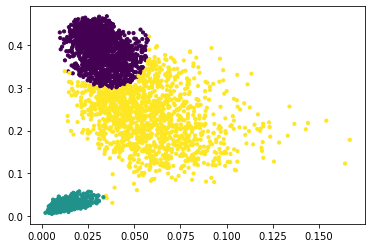

In [101]:
gausno = 3
gmm = GaussianMixture(n_components=gausno).fit(Qs)
labels = gmm.predict(Qs)

plt.scatter(q4,q6, c=labels, s=10, cmap='viridis')
prediction_gmm = gmm.predict(Qs)
probstandard = gmm.predict_proba(Qs)

In [102]:
bulk = 0.
interface = 0.
hot = 0.
for i in range(natom):
    if abs(x[i]) > 7.5:
        print(np.where(probstandard[i] == max(probstandard[i])) , i)

(array([0]),) 0
(array([2]),) 1
(array([0]),) 3
(array([2]),) 4
(array([0]),) 5
(array([0]),) 6
(array([0]),) 8
(array([0]),) 9
(array([0]),) 10
(array([0]),) 11
(array([0]),) 12
(array([0]),) 13
(array([2]),) 15
(array([2]),) 16
(array([0]),) 17
(array([0]),) 19
(array([0]),) 20
(array([0]),) 25
(array([2]),) 27
(array([0]),) 29
(array([0]),) 30
(array([0]),) 31
(array([0]),) 33
(array([0]),) 34
(array([0]),) 35
(array([0]),) 36
(array([0]),) 37
(array([0]),) 40
(array([0]),) 41
(array([0]),) 42
(array([0]),) 44
(array([0]),) 47
(array([0]),) 48
(array([0]),) 49
(array([0]),) 50
(array([2]),) 51
(array([0]),) 53
(array([0]),) 54
(array([0]),) 55
(array([0]),) 57
(array([0]),) 58
(array([0]),) 59
(array([0]),) 60
(array([2]),) 61
(array([0]),) 63
(array([2]),) 67
(array([0]),) 68
(array([2]),) 71
(array([0]),) 74
(array([0]),) 75
(array([0]),) 76
(array([0]),) 77
(array([0]),) 78
(array([2]),) 79
(array([0]),) 82
(array([0]),) 83
(array([0]),) 84
(array([0]),) 85
(array([0]),) 86
(arra

(array([2]),) 2318
(array([0]),) 2331
(array([0]),) 2333
(array([2]),) 2339
(array([2]),) 2353
(array([2]),) 2372
(array([0]),) 2392
(array([2]),) 2401
(array([0]),) 2412
(array([0]),) 2414
(array([0]),) 2415
(array([0]),) 2420
(array([0]),) 2427
(array([0]),) 2430
(array([2]),) 2434
(array([0]),) 2449
(array([0]),) 2468
(array([0]),) 2471
(array([0]),) 2472
(array([0]),) 2477
(array([0]),) 2480
(array([0]),) 2487
(array([0]),) 2494
(array([0]),) 2496
(array([0]),) 2500
(array([0]),) 2509
(array([0]),) 2510
(array([0]),) 2513
(array([0]),) 2514
(array([0]),) 2521
(array([0]),) 2531
(array([0]),) 2538
(array([0]),) 2541
(array([0]),) 2553
(array([0]),) 2556
(array([0]),) 2560
(array([0]),) 2561
(array([0]),) 2562
(array([0]),) 2569
(array([0]),) 2575
(array([2]),) 2579
(array([2]),) 2585
(array([0]),) 2593
(array([0]),) 2594
(array([0]),) 2597
(array([0]),) 2598
(array([2]),) 2600
(array([2]),) 2604
(array([0]),) 2605
(array([2]),) 2620
(array([2]),) 2624
(array([0]),) 2640
(array([2]),

In [103]:
bulk = 0.
interface = 0.
hot = 0.
crystal = 0.
liquid = 0.
for i in range(natom):
    if abs(x[i]) > 7.5:
        a = np.where(probstandard[i] == max(probstandard[i]))
        #print(a,i,type(a))
        if 0 in a:
            crystal += 1.
        elif 2 in a:
            liquid += 1.
        bulk += 1.
print(crystal/bulk , liquid/bulk) 

0.7433570965651328 0.2566429034348671


In [104]:
bulk = 0.
interface = 0.
hot = 0.
crystal = 0.
liquid = 0.
for i in range(natom):
    if abs(x[i]) < 7.5 and abs(x[i]) > L/4.:
        a = np.where(probstandard[i] == max(probstandard[i]))
        #print(a,i,type(a))
        if 0 in a:
            crystal += 1.
        elif 2 in a:
            liquid += 1.
        interface += 1.
print(crystal/interface , liquid/interface)  

0.18855218855218855 0.8114478114478114
